Chapter 2
Supervised Machine Learning (Batch Learning)

What is Supervised Machine Learning?
Regression vs Classification

Data Preparation and Preprocessing Techniques

In [ ]:

# Next Steps after seeing the correlation

# Data Analysis
# Handling Missing Values
# Removing Duplicates
# Outlier Detection
# Handling Outliers
# Handling Categorical Data issues
# Handling Numerical Data issues
# Feature Engineering
# Feature Selection
# Data Transformation (Handling Skewness)
# Data Normalization (Scaling like standardization, MinMaxScaler, RobustScaler)
# Data Encoding (One-Hot Encoding, Label Encoding, Ordinal Encoding)
# Class Imbalance Handling
# Data Splitting
# Modeling
# Cross-Validation
# Hyperparameter Tuning
# Model Evaluation
# Model Interpretability
# Model Deployment

In [18]:
# Normal Distribution
# It basically means how the data is distributed

# How to check if data is normally distributed?
# 1. Histogram
# 2. Usiing skew function

<Axes: >

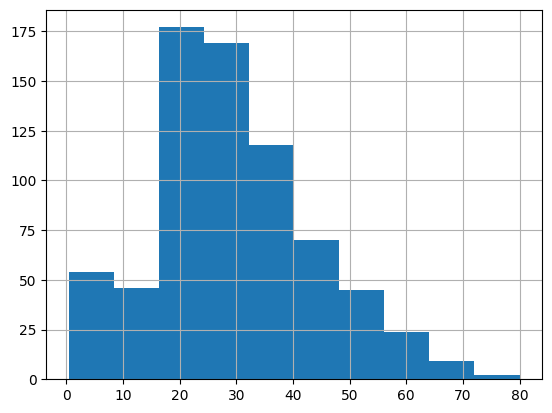

In [19]:
# Check for Normal Distribution using Histogram
df['Age'].hist()

<Axes: >

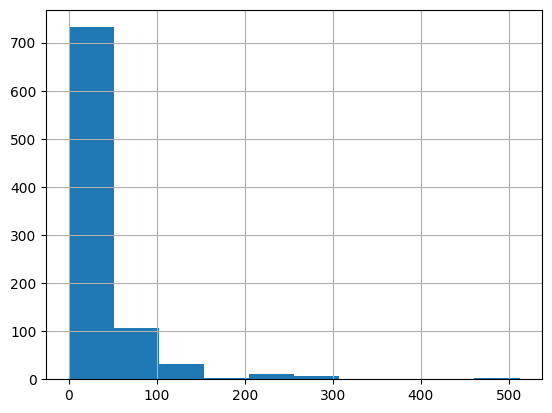

In [20]:
# Check for Normal Distribution using Histogram
df['Fare'].hist()

In [24]:
# Check for Normal Distribution using Skew
# Generaaly, we consider data is normally distributed if skew value is between -0.5 to 0.5
# If skew value is less than -0.5 then data is left skewed
# If skew value is greater than 0.5 then data is right skewed

age=df['Age'].skew()
fare= df['Fare'].skew()
print(age, fare)

0.38910778230082704 4.787316519674893


In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [104]:
# After finding the all issues of data, we need to solve them one by one

In [120]:
# Feature Engineering
# Feature Engineering is the process of creating new features from existing features
# Feature Engineering can help improve the performance of machine learning models
# Feature Engineering can involve creating new features, transforming existing features, and selecting important features

# Feature Engineering Techniques
# 1. Creating New Features
# 2. Transforming Existing Features
# 3. Selecting Important Features

# Creating New Features
# We can create new features by combining existing features
# Example: We can create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'

# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']


In [121]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [122]:
# Since we have created new feature 'FamilySize', we can remove 'SibSp' and 'Parch' columns
df = df.drop(columns=['SibSp', 'Parch'])


In [123]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [124]:
df['FamilySize'].value_counts()

FamilySize
0    402
1    139
2     93
3     27
5     22
6     12
4     11
7      6
Name: count, dtype: int64

In [ ]:
# After creating new feature 'FamilySize', we can move to next step
# Now we can even transform FamilySize into binary column like small, medium, large family based on the values of FamilySize

# Transform the 'FamilySize' column into binary categories
# Update 'FamilySize' to categorical based on specified bins
# Make sure FamilySize is numeric (just in case it's not)
df['FamilySize'] = pd.to_numeric(df['FamilySize'], errors='coerce')

df['FamilySize'] = pd.cut(df['FamilySize'], bins=[0, 1, 3, 20, float('inf')], labels=['Small', 'Medium', 'Large', 'Very Large'])

# Transforming Existing Features
# We can transform existing features to make them more suitable for analysis
# Example: We can transform the 'Age' column into age groups

# Transform the 'Age' column into age groups
# Update 'Age' to categorical based on specified bins
df['Age'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'Young', 'Adult', 'Senior'])




In [130]:
# Further we can transform Fare column into fare groups
# Transform the 'Fare' column into fare groups
# Update 'Fare' to categorical based on specified bins
df['Fare'] = pd.cut(df['Fare'], bins=[0, 10, 20, 30, 40, 50, 100, 200, float('inf')], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200+'])


In [131]:
# This way we can do feature engineering in machine learning

In [ ]:
# Feature Selection
# Feature Selection is the process of selecting important features for analysis
# Feature Selection can help improve the performance of machine learning models
# Feature Selection can involve removing irrelevant features, redundant features, or highly correlated features

# Feature Selection Techniques
# 1. Using Domain Knowledge

In [32]:
# Data Transformation

# Check for Normal Distribution using Skew
# Generaaly, we consider data is normally distributed if skew value is between -0.5 to 0.5
# If skew value is less than -0.5 then data is left skewed
# If skew value is greater than 0.5 then data is right skewed

age=df['Age'].skew()
fare= df['Fare'].skew()
print(age, fare)

0.5102446555756495 4.787316519674893


In [33]:
# Here, 'Age' is right skewed and 'Fare' is right skewed because skew value is greater than 0.5
# So we need to apply transformation to make it normally distributed
# For right skewed data, we can apply log1p transformation
# For left skewed data, we can apply Box-Cox transformation

# Note, we dont apply box cox where data is zero or negative values so alternative is yeo-johnson transformation
# Note, if there is 0 in right skewed data then we can apply log1p else we can apply log 


In [35]:
# Program to check what to apply in age and fare

import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def suggest_transformation(df, column_name):
    skewness = df[column_name].skew()
    print(f"Skewness of {column_name}: {skewness}")

    # Right-Skewed Data
    if skewness > 0.5:  
        # Check for zero or negative values
        if (df[column_name] <= 0).any():  # Contains zero or negative values
            print(f"Suggested Transformation for {column_name}: Use log1p (log(1+x))")
            print(f"Reason: The data is right-skewed (skewness = {skewness}), and contains zero or negative values. Use log1p(x) to handle zeros.")
        else:
            print(f"Suggested Transformation for {column_name}: Use log (log(x))")
            print(f"Reason: The data is right-skewed (skewness = {skewness}), and contains only positive values. Use log(x).")
    
    # Left-Skewed Data
    elif skewness < -0.5:  
        # Check for zero or negative values
        if (df[column_name] <= 0).any():  # Contains zero or negative values
            print(f"Suggested Transformation for {column_name}: Use Yeo-Johnson Transformation")
            print(f"Reason: The data is left-skewed (skewness = {skewness}), and contains zero or negative values. Use Yeo-Johnson transformation.")
        else:
            print(f"Suggested Transformation for {column_name}: Use Box-Cox Transformation")
            print(f"Reason: The data is left-skewed (skewness = {skewness}), and contains only positive values. Use Box-Cox transformation.")
    
    # Data is approximately normal
    else:
        print(f"{column_name} is approximately normal (skewness = {skewness}). No transformation needed.")
    
# Example: Apply to any column in your dataframe
df = df.copy()  # Make a copy of the original dataframe before applying transformations

# Call the function for any column (e.g., 'Age' or 'Fare')
suggest_transformation(df, 'Age')
suggest_transformation(df, 'Fare')



Skewness of Age: 0.5102446555756495
Suggested Transformation for Age: Use log (log(x))
Reason: The data is right-skewed (skewness = 0.5102446555756495), and contains only positive values. Use log(x).
Skewness of Fare: 4.787316519674893
Suggested Transformation for Fare: Use log1p (log(1+x))
Reason: The data is right-skewed (skewness = 4.787316519674893), and contains zero or negative values. Use log1p(x) to handle zeros.


In [36]:
import numpy as np

# Apply log transformation to Age (right-skewed, only positive values)
df['Age'] = np.log(df['Age'])  # Apply log(x) transformation to Age
print("Applied log transformation to Age")

# Apply log1p transformation to Fare (right-skewed, might contain zero or negative values)
df['Fare'] = np.log1p(df['Fare'])  # Apply log(1 + x) transformation to Fare
print("Applied log1p transformation to Fare")

# Check the first few rows to confirm the transformations
df[['Age', 'Fare']].head()


Applied log transformation to Age
Applied log1p transformation to Fare


,Age,Fare
0,3.091042,2.110213
1,3.637586,4.280593
2,3.258097,2.188856
3,3.555348,3.990834
4,3.555348,2.202765


In [132]:
# Data Normalization
# Data Normalization is the process of scaling data to a fixed range
# Data Normalization can help improve the performance of machine learning models
# Data Normalization can involve scaling features to a range of [0, 1] or [-1, 1]

# Data Normalization Techniques
# 1. Standardization (We use often)
# 2. Min-Max Scaling 
# 3. Robust Scaling (Specifically for Outliers)

In [133]:
# Data Encoding
# Data Encoding is the process of converting categorical data into numerical data
# Data Encoding can help improve the performance of machine learning models
# Data Encoding can involve converting text data into numerical data using techniques 
# like One-Hot Encoding, Label Encoding, and Ordinal Encoding  

# We use One-Hot Encoding for Categorical Data which is nominal data
# We use Label Encoding for Categorical Data which is ordinal data 



In [134]:
# Make a target column balanced here before going to data split
# Class Imbalance Handling
# Class Imbalance is a common problem in machine learning
# Class Imbalance occurs when one class has significantly more samples than another class
# Class Imbalance can lead to biased machine learning models
# Class Imbalance can be handled using techniques like Oversampling, Undersampling, and SMOTE


In [135]:
# Train-Test Split
# Train-Test Split is the process of splitting data into training and testing sets
# Train-Test Split can help evaluate the performance of machine learning models
# Train-Test Split can involve splitting data into training and testing sets using a specified ratio (e.g., 80-20)


In [136]:
# Modeling
# Modeling is the process of building machine learning models
# Modeling can involve selecting the appropriate machine learning algorithm
# Modeling can involve training the machine learning model on the training data
# Modeling can involve evaluating the machine learning model on the testing data


In [137]:
# Evaluation
# Evaluation is the process of assessing the performance of machine learning models
# Evaluation can involve using metrics like Accuracy, Precision, Recall, F1 Score, and ROC-AUC
# Evaluation can involve using techniques like Cross-Validation and Hyperparameter Tuning


In [138]:
# Model Interpretability
# Model Interpretability is the process of understanding how machine learning models make predictions
# Model Interpretability can involve understanding the importance of features in machine learning models
# Model Interpretability can involve visualizing the decision-making process of machine learning models


In [139]:
# Model Deployment
# Model Deployment is the process of making machine learning models available for use
# Model Deployment can involve deploying machine learning models as web applications, APIs, or services
# Model Deployment can involve monitoring the performance of machine learning models in production
